In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons

In [3]:
x,y = make_moons(n_samples=400,noise=0.01)


In [4]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [5]:
dataset = pd.DataFrame(df)
dataset

,x1,x2,y
0,-0.303755,0.946185,0
1,0.951535,-0.496939,1
2,0.868624,0.466722,0
3,0.655701,0.755444,0
4,0.249931,-0.173346,1
...,...,...,...
395,0.930156,0.397034,0
396,0.997051,0.076459,0
397,0.191567,-0.103540,1
398,-0.313182,0.930972,0


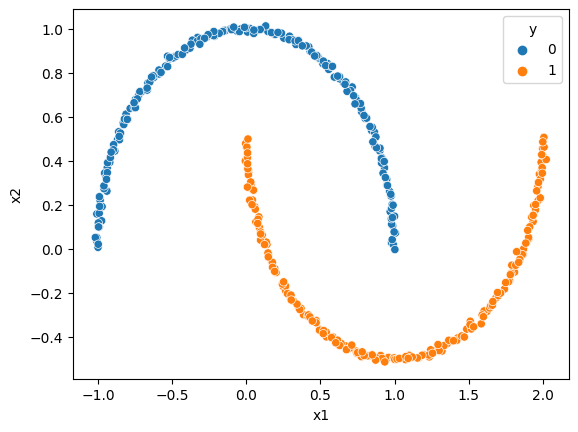

In [6]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")
plt.show()

In [7]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]
x_a

,x1,x2
0,-0.303755,0.946185
1,0.951535,-0.496939
2,0.868624,0.466722
3,0.655701,0.755444
4,0.249931,-0.173346
...,...,...
395,0.930156,0.397034
396,0.997051,0.076459
397,0.191567,-0.103540
398,-0.313182,0.930972


In [8]:

from sklearn.svm import SVC

sv = SVC()


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size=0.5,random_state=42)

In [11]:

sv.fit(x_train,y_train)


SVC()

In [12]:
sv.score(x_train,y_train),sv.score(x_test,y_test)

(1.0, 1.0)

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=10)

In [15]:
bg.fit(x_train,y_train)

BaggingClassifier(estimator=SVC())

In [16]:
bg.score(x_train,y_train),bg.score(x_test,y_test)

(1.0, 1.0)

In [17]:
rd = RandomForestClassifier(n_estimators=10)

In [18]:
rd.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
rd.score(x_train,y_train),rd.score(x_test,y_test)

(0.995, 0.995)